In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the iris dataset
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris_df.size

750

In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
#Checking for class imbalance
iris_df['count'] = 1
iris_df[['species', 'count']].groupby('species').count()

,count
species,
setosa,50
versicolor,50
virginica,50


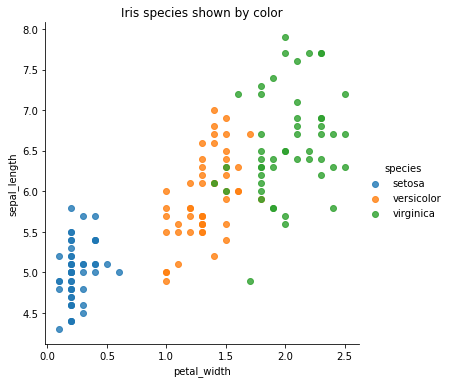

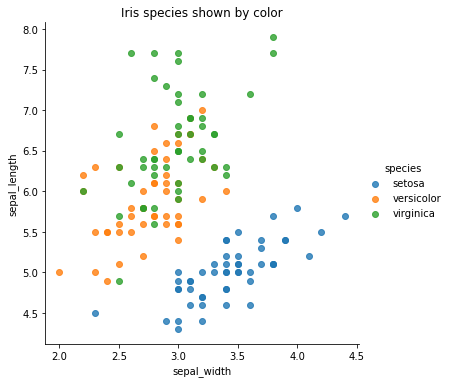

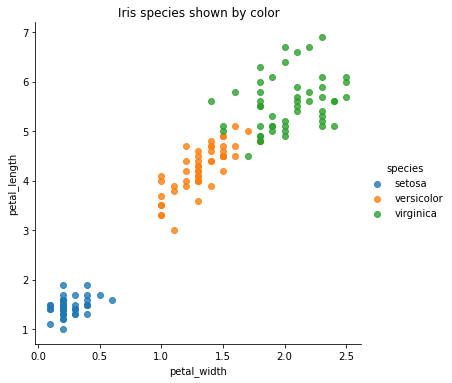

In [11]:
#Data Visualization
def plot_iris(iris, col1, col2):
    sns.lmplot(x= col1, y = col2,
              data = iris_df,
              hue = 'species',
              fit_reg = False)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('Iris species shown by color')
    plt.show()
plot_iris(iris_df, 'petal_width', 'sepal_length')
plot_iris(iris_df, 'sepal_width', 'sepal_length')
plot_iris(iris_df, 'petal_width', 'petal_length')

PREPARE THE DATA SET

In [13]:
# Scaling the nnumerical columns in the dataset
from sklearn.preprocessing import scale
num_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
iris_scaled = scale(iris_df[num_cols])
iris_scaled = pd.DataFrame(iris_scaled, columns = num_cols)
print(iris_scaled.describe().round(3))

       sepal_length  sepal_width  petal_length  petal_width
count       150.000      150.000       150.000      150.000
mean         -0.000       -0.000        -0.000       -0.000
std           1.003        1.003         1.003        1.003
min          -1.870       -2.434        -1.568       -1.447
25%          -0.901       -0.592        -1.227       -1.184
50%          -0.053       -0.132         0.336        0.133
75%           0.675        0.559         0.763        0.791
max           2.492        3.091         1.786        1.712


In [14]:
levels = {'setosa':0, 'versicolor':1, 'virginica':2}
iris_scaled['species'] = [levels[x] for x in iris_df['species']]
iris_scaled.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


In [17]:
X = iris_scaled.drop(['species'], axis = 1)
Y = iris_scaled['species']

In [23]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
np.random.seed(3456)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 75)


In [28]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
40,-1.021849,1.019004,-1.397064,-1.183812
13,-1.870024,-0.131979,-1.510739,-1.447076
50,1.401508,0.328414,0.535409,0.264142
139,1.280340,0.098217,0.933271,1.185567
59,-0.779513,-0.822570,0.080709,0.264142
...,...,...,...,...
71,0.310998,-0.592373,0.137547,0.132510
145,1.038005,-0.131979,0.819596,1.448832
92,-0.052506,-1.052767,0.137547,0.000878
19,-0.900681,1.709595,-1.283389,-1.183812


In [30]:
y_train

40     0
13     0
50     1
139    2
59     1
      ..
71     1
145    2
92     1
19     0
68     1
Name: species, Length: 75, dtype: int64

In [31]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
82,-0.052506,-0.822570,0.080709,0.000878
83,0.189830,-0.822570,0.762758,0.527406
24,-1.264185,0.788808,-1.056039,-1.315444
16,-0.537178,1.939791,-1.397064,-1.052180
103,0.553333,-0.362176,1.046945,0.790671
...,...,...,...,...
20,-0.537178,0.788808,-1.169714,-1.315444
61,0.068662,-0.131979,0.251221,0.395774
34,-1.143017,0.098217,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444


In [32]:
y_test

82     1
83     1
24     0
16     0
103    2
      ..
20     0
61     1
34     0
8      0
133    2
Name: species, Length: 75, dtype: int64

In [33]:
#Define and Train the KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN_mod = KNeighborsClassifier(n_neighbors=3)
KNN_mod.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
prediction = KNN_mod.predict(x_test)

In [39]:
#Calculating the data accuracy
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, prediction))

Accuracy 0.96


In [44]:
x_test['predicted'] = prediction
x_test['correct'] = [1 if x==z else 0 for x, z in zip(x_test['predicted'], y_test)]
x_test

<ipython-input-44-b86b4d68a335>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['predicted'] = prediction
<ipython-input-44-b86b4d68a335>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['correct'] = [1 if x==z else 0 for x, z in zip(x_test['predicted'], y_test)]


,sepal_length,sepal_width,petal_length,petal_width,predicted,correct
82,-0.052506,-0.822570,0.080709,0.000878,1,1
83,0.189830,-0.822570,0.762758,0.527406,2,0
24,-1.264185,0.788808,-1.056039,-1.315444,0,1
16,-0.537178,1.939791,-1.397064,-1.052180,0,1
103,0.553333,-0.362176,1.046945,0.790671,2,1
...,...,...,...,...,...,...
20,-0.537178,0.788808,-1.169714,-1.315444,0,1
61,0.068662,-0.131979,0.251221,0.395774,1,1
34,-1.143017,0.098217,-1.283389,-1.315444,0,1
8,-1.748856,-0.362176,-1.340227,-1.315444,0,1


In [49]:
levels = {0:'setosa', 1:'versicolor', 2:'virginica'}
x_test['species'] = [levels[x] for x in prediction]
markers = {1:'^', 0:'o'}
colors = {'setosa':'blue', 'versicolor':'green', 'virginica':'red'}
x_test

<ipython-input-49-7cf513fa64ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['species'] = [levels[x] for x in prediction]


,sepal_length,sepal_width,petal_length,petal_width,predicted,correct,species
82,-0.052506,-0.822570,0.080709,0.000878,1,1,versicolor
83,0.189830,-0.822570,0.762758,0.527406,2,0,virginica
24,-1.264185,0.788808,-1.056039,-1.315444,0,1,setosa
16,-0.537178,1.939791,-1.397064,-1.052180,0,1,setosa
103,0.553333,-0.362176,1.046945,0.790671,2,1,virginica
...,...,...,...,...,...,...,...
20,-0.537178,0.788808,-1.169714,-1.315444,0,1,setosa
61,0.068662,-0.131979,0.251221,0.395774,1,1,versicolor
34,-1.143017,0.098217,-1.283389,-1.315444,0,1,setosa
8,-1.748856,-0.362176,-1.340227,-1.315444,0,1,setosa


'Done'

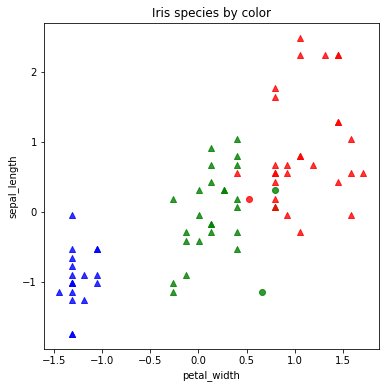

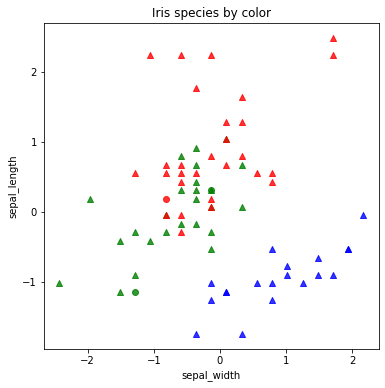

In [51]:
#Plotting the data to visualize misclassified species
def plot_shapes (df, col1, col2, markers, colors):
    ax = plt.figure(figsize = (6, 6)).gca()
    for m in markers:
        for c in colors:
            df_temp = df[(df['correct'] == m) & (df['species'] == c)]
            sns.regplot(x=col1, y = col2,
                       data = df_temp,
                       fit_reg = False,
                       scatter_kws={'color': colors[c]},
                       marker = markers[m],
                       ax=ax)
            
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title("Iris species by color")
    return 'Done'
plot_shapes(x_test, 'petal_width', 'sepal_length', markers, colors)
plot_shapes(x_test, 'sepal_width', 'sepal_length', markers, colors)